In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/sf_crime_weather.csv', index_col=0)
data.head(5)

,crime_level_sum,crime_count,weather_crime_count,violent_count,COP_count,gun_crime_count,dayofweek,day,month,year,...,cloud_cover,events,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
2003-01-01,1078,541,143,91.0,134.0,5.0,wednesday,1,1,2003,...,37,No,86,578.733333,0.950084,364.602000,48,52,160.246207,75.602722
2003-01-02,731,399,72,39.0,53.0,1.0,thursday,2,1,2003,...,62,No,79,579.400000,0.983944,220.172000,50,54,174.834219,79.559031
2003-01-03,802,435,84,42.0,65.0,0.0,friday,3,1,2003,...,50,No,56,580.100000,0.017763,290.050000,50,55,165.091411,77.938166
2003-01-04,678,347,65,44.0,59.0,3.0,saturday,4,1,2003,...,50,Fog,295,580.866667,0.051546,290.433333,52,57,203.511400,86.591989
2003-01-05,749,371,101,49.0,72.0,2.0,sunday,5,1,2003,...,50,Fog,22,581.700000,0.085328,290.850000,52,55,220.937501,89.274978


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 2003-01-01 to 2015-12-31
Data columns (total 37 columns):
crime_level_sum        4745 non-null int64
crime_count            4745 non-null int64
weather_crime_count    4745 non-null int64
violent_count          4745 non-null float64
COP_count              4745 non-null float64
gun_crime_count        4745 non-null float64
dayofweek              4745 non-null object
day                    4745 non-null int64
month                  4745 non-null int64
year                   4745 non-null int64
temp_max               4745 non-null int64
temp_mean              4745 non-null int64
temp_min               4745 non-null int64
temp_delta             4745 non-null int64
dew_point_max          4745 non-null int64
dew_point_mean         4745 non-null float64
dew_point_min          4745 non-null int64
humidity_max           4745 non-null int64
humidity_mean          4745 non-null int64
humidity_min           4745 non-null int64
sl_pressure_ma

## Data Cleaning

In [5]:
data.index = pd.to_datetime(data.index)
data.head()

,crime_level_sum,crime_count,weather_crime_count,violent_count,COP_count,gun_crime_count,dayofweek,day,month,year,...,cloud_cover,events,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
2003-01-01,1078,541,143,91.0,134.0,5.0,wednesday,1,1,2003,...,37,No,86,578.733333,0.950084,364.602000,48,52,160.246207,75.602722
2003-01-02,731,399,72,39.0,53.0,1.0,thursday,2,1,2003,...,62,No,79,579.400000,0.983944,220.172000,50,54,174.834219,79.559031
2003-01-03,802,435,84,42.0,65.0,0.0,friday,3,1,2003,...,50,No,56,580.100000,0.017763,290.050000,50,55,165.091411,77.938166
2003-01-04,678,347,65,44.0,59.0,3.0,saturday,4,1,2003,...,50,Fog,295,580.866667,0.051546,290.433333,52,57,203.511400,86.591989
2003-01-05,749,371,101,49.0,72.0,2.0,sunday,5,1,2003,...,50,Fog,22,581.700000,0.085328,290.850000,52,55,220.937501,89.274978


In [8]:
# Type the categoricals
data['events'] = data['events'].astype('category')
data['dayofweek'] = data['dayofweek'].astype('category')

# The date features are really categories not numbers. December is not 12 times as 'monthy' as January
data['day'] = data['day'].astype('category')
data['month'] = data['month'].astype('category')
data['year'] = data['year'].astype('category')
dworder = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday','friday', 'saturday']

data.describe()

C:\Users\phay\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,crime_level_sum,crime_count,weather_crime_count,violent_count,COP_count,gun_crime_count,temp_max,temp_mean,temp_min,temp_delta,...,precipitation,cloud_cover,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,...,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000
mean,720.585669,382.032666,77.934879,39.756164,60.809062,3.313804,65.849947,58.662803,51.171760,14.678188,...,0.047181,44.920759,246.122234,732.011640,0.512256,406.803915,58.662803,65.849947,216.646295,93.021698
std,87.805220,46.288691,13.882995,9.260436,11.259500,2.130232,8.402315,6.530743,5.707621,5.867343,...,0.191603,28.926472,71.727288,106.738169,0.288648,223.377818,6.530743,8.402315,60.304576,18.359682
min,292.000000,148.000000,18.000000,6.000000,18.000000,0.000000,45.000000,40.000000,32.000000,2.000000,...,0.000000,0.000000,1.000000,575.300000,0.012958,0.000000,40.000000,45.000000,55.000000,38.602076
25%,662.000000,352.000000,68.000000,34.000000,53.000000,2.000000,60.000000,54.000000,47.000000,11.000000,...,0.000000,25.000000,235.000000,628.583333,0.262623,219.329167,54.000000,60.000000,172.486051,79.344245
50%,718.000000,381.000000,77.000000,39.000000,60.000000,3.000000,65.000000,59.000000,52.000000,14.000000,...,0.000000,50.000000,273.000000,733.233333,0.510797,412.583333,59.000000,65.000000,219.701946,92.693869
75%,776.000000,412.000000,86.000000,45.000000,68.000000,5.000000,71.000000,63.000000,55.000000,18.000000,...,0.000000,75.000000,290.000000,835.733333,0.761123,579.466667,63.000000,71.000000,259.600068,105.415039
max,1182.000000,579.000000,158.000000,91.000000,134.000000,16.000000,99.000000,82.000000,69.000000,39.000000,...,3.430000,100.000000,359.000000,885.650000,1.012482,885.633333,82.000000,99.000000,429.726716,161.898428


## Outliers

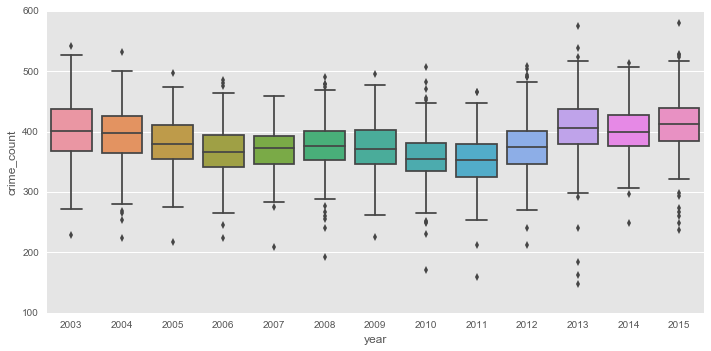

In [9]:
sb.factorplot(data = data, y = 'crime_count', x = 'year', size=5, aspect=2, kind = 'box');

In [11]:
data.sort_values('crime_count', ascending=True).head(20)

,crime_level_sum,crime_count,weather_crime_count,violent_count,COP_count,gun_crime_count,dayofweek,day,month,year,...,cloud_cover,events,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
2013-12-25,306,148,39,20.0,27.0,2.0,wednesday,25,12,2013,...,0,No,218,575.833333,0.759167,575.833333,53,63,133.540731,76.470098
2011-12-25,310,159,43,21.0,25.0,1.0,sunday,25,12,2011,...,25,No,206,575.716667,0.020990,431.787500,44,52,97.876907,60.428454
2013-12-24,292,162,18,6.0,18.0,0.0,tuesday,24,12,2013,...,25,No,308,575.633333,0.725214,431.725000,52,59,135.441457,75.218542
2010-12-25,346,171,46,32.0,32.0,0.0,saturday,25,12,2010,...,75,Rain,153,575.766667,0.662599,143.941667,52,56,158.678275,73.390189
2013-12-23,378,184,46,25.0,47.0,1.0,monday,23,12,2013,...,12,No,32,575.483333,0.691261,506.425333,52,60,135.441457,75.918542
2008-12-25,396,193,58,31.0,43.0,4.0,thursday,25,12,2008,...,62,Rain-Thunderstorm,277,575.866667,0.928196,218.829333,49,54,136.502310,59.215718
2007-12-25,394,209,50,26.0,41.0,4.0,tuesday,25,12,2007,...,37,Rain,272,575.683333,0.525707,362.680500,47,54,88.908267,54.475715
2011-11-24,379,212,44,22.0,39.0,2.0,thursday,24,11,2011,...,62,Rain,255,596.216667,0.970036,226.562333,52,56,171.167687,75.626013
2012-12-25,399,213,46,24.0,39.0,0.0,tuesday,25,12,2012,...,87,Rain,217,575.900000,0.407769,74.867000,49,54,144.940989,70.557889
2005-12-25,437,217,50,32.0,51.0,3.0,sunday,25,12,2005,...,100,Rain,136,575.800000,0.804858,0.000000,58,60,270.815564,101.351244


In [14]:
data = data[data['crime_count'] < 525]

## Plotting

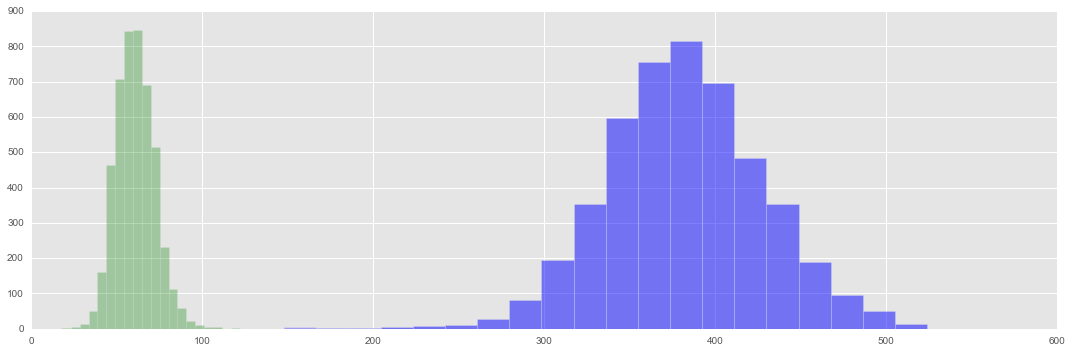

In [15]:
fig = plt.figure(figsize=(15,5))
data['crime_count'].hist(bins=20, color='b', alpha=.5);
#data['weather_crime_count'].hist(bins=20, color='r', alpha=.3);
#data['violent_count'].hist(bins=20, color='y', alpha=.3);
data['COP_count'].hist(bins=20, color='g', alpha=.3);
plt.tight_layout();

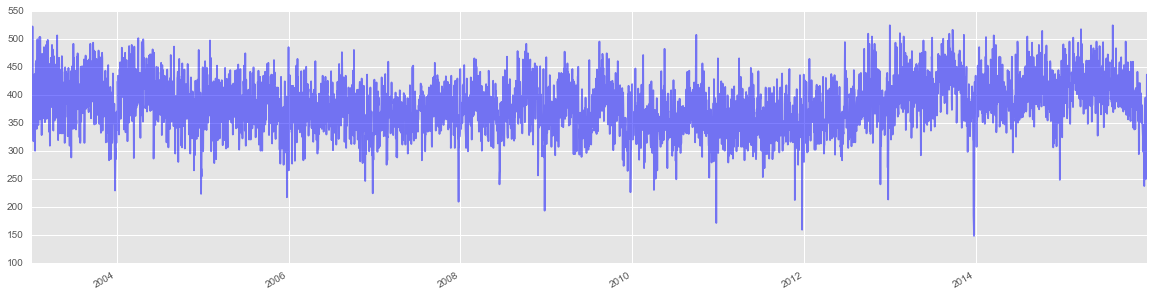

In [17]:
"""
 CRIME OVER TIME
"""
fig = plt.figure(figsize=(20,5))
data['crime_count'].plot(color='b', alpha=.5)
plt.show()

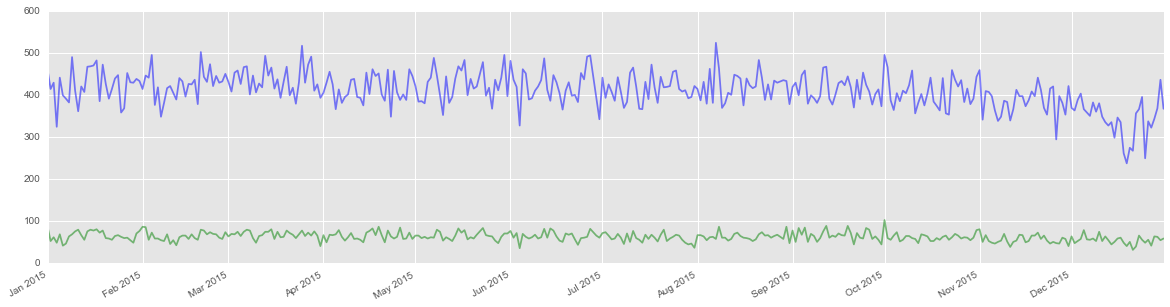

In [19]:
"""
ONLY IN 2015
"""
fig = plt.figure(figsize=(20,5))
data['2015'] ['crime_count'].plot(color='b', alpha=.5)
#data['weather_crime_count'].plot(color='r', alpha=.5)
#data['violent_count'].plot(color='y', alpha=.5)
data['2015']['COP_count'].plot(color='g', alpha=.5)

plt.show()

C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


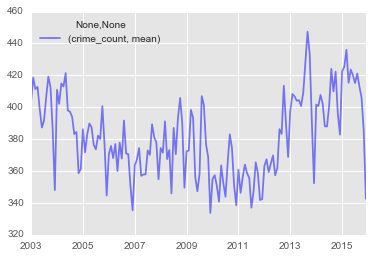

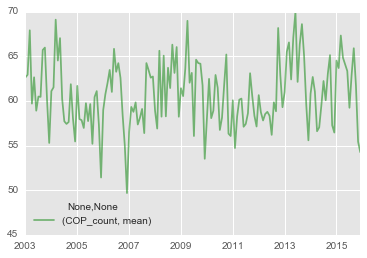

In [22]:
"""
Years sampled by months and TEMP
"""
fig = plt.figure(figsize=(20,5))
data[['crime_count']].resample('M', how=['mean']).plot(color='b', alpha=.5)
data[['COP_count']].resample('M', how=['mean']).plot(color='g', alpha=.5)

plt.show()

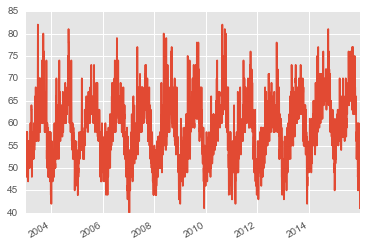

In [23]:
# TEMP
data['temp_mean'].plot()

## Correlations

In [24]:
data.corr()

,crime_level_sum,crime_count,weather_crime_count,violent_count,COP_count,gun_crime_count,temp_max,temp_mean,temp_min,temp_delta,...,precipitation,cloud_cover,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
crime_level_sum,1.000000,0.961047,0.635361,0.590465,0.652038,0.091444,0.229658,0.235769,0.212336,0.122221,...,-0.164514,-0.115324,0.102251,0.073441,0.013146,0.119790,0.235769,0.229658,0.217893,0.242765
crime_count,0.961047,1.000000,0.474824,0.400103,0.516247,0.060298,0.211380,0.216178,0.191656,0.116170,...,-0.174817,-0.116347,0.099939,0.068669,0.010264,0.117671,0.216178,0.211380,0.196148,0.220946
weather_crime_count,0.635361,0.474824,1.000000,0.829148,0.807247,0.243960,0.192905,0.185693,0.141410,0.138586,...,-0.122414,-0.085170,0.113078,0.082365,0.016901,0.095390,0.185693,0.192905,0.120598,0.156518
violent_count,0.590465,0.400103,0.829148,1.000000,0.812350,0.096930,0.193282,0.179858,0.132194,0.148089,...,-0.100741,-0.092985,0.088648,0.059008,0.020845,0.100256,0.179858,0.193282,0.115809,0.155507
COP_count,0.652038,0.516247,0.807247,0.812350,1.000000,0.249907,0.164463,0.155241,0.118571,0.120088,...,-0.118942,-0.084260,0.082104,0.057504,0.023095,0.090952,0.155241,0.164463,0.110645,0.140340
gun_crime_count,0.091444,0.060298,0.243960,0.096930,0.249907,1.000000,0.025073,0.025397,0.020147,0.016294,...,-0.025908,-0.009922,0.025245,0.033687,-0.000213,0.019041,0.025397,0.025073,0.002949,0.011294
temp_max,0.229658,0.211380,0.192905,0.193282,0.164463,0.025073,1.000000,0.950727,0.716375,0.734638,...,-0.214172,-0.431554,0.434094,0.498446,0.025979,0.541517,0.950727,1.000000,0.697070,0.851906
temp_mean,0.235769,0.216178,0.185693,0.179858,0.155241,0.025397,0.950727,1.000000,0.893380,0.491997,...,-0.165564,-0.249707,0.415625,0.553828,0.024696,0.389211,1.000000,0.950727,0.827489,0.930239
temp_min,0.212336,0.191656,0.141410,0.132194,0.118571,0.020147,0.716375,0.893380,1.000000,0.052906,...,-0.066979,0.056969,0.315104,0.548628,0.019957,0.104386,0.893380,0.716375,0.878536,0.883854
temp_delta,0.122221,0.116170,0.138586,0.148089,0.120088,0.016294,0.734638,0.491997,0.052906,1.000000,...,-0.241401,-0.673055,0.314887,0.179911,0.017776,0.673536,0.491997,0.734638,0.143387,0.359824


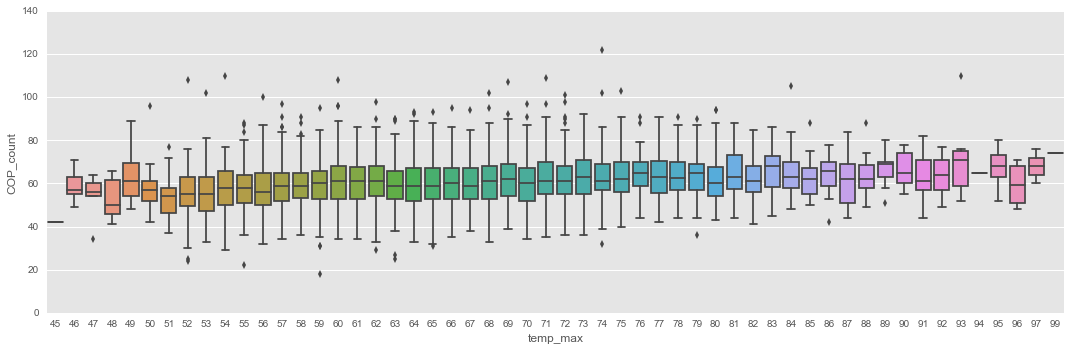

In [26]:
"""
LOOK AT CRIME OVER TEMP
"""
plot_feature = 'COP_count'

data.sort_values('temp_max', inplace=True)
sb.factorplot(data = data, y = plot_feature, x = 'temp_max', size=5, aspect=3, kind = 'box');

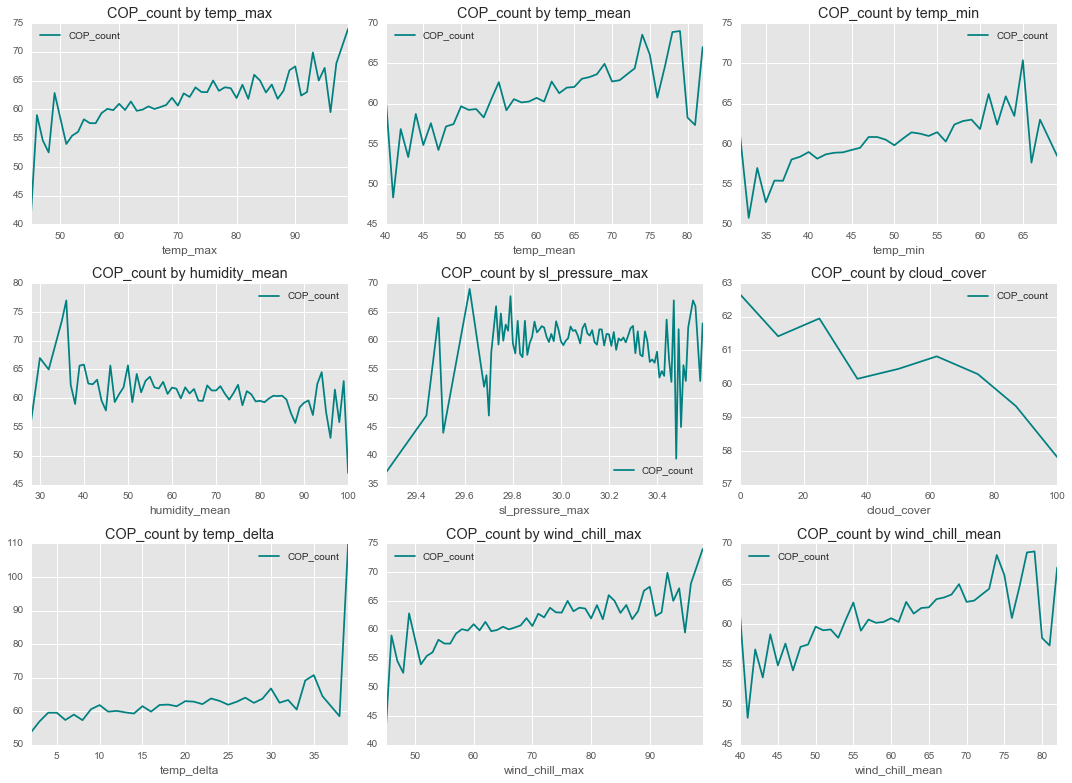

In [27]:
i_features = ['temp_max', 'temp_mean', 'temp_min', 
                 'humidity_mean', 'sl_pressure_max',
                 'cloud_cover', 'temp_delta',
                 'wind_chill_max', 'wind_chill_mean']
fig = plt.figure(figsize=(15,25))
for i, field in enumerate(i_features):
    ax = plt.subplot(7,3,i+1)
    plot_title = plot_feature + ' by ' + str(field)
    group = data.groupby([field])[[plot_feature]].mean()
    group.plot(ax=ax, kind='line', color='teal', title=plot_title)
#    plot_title = 'Test Positive ratio by ' + str(field)
plt.tight_layout();

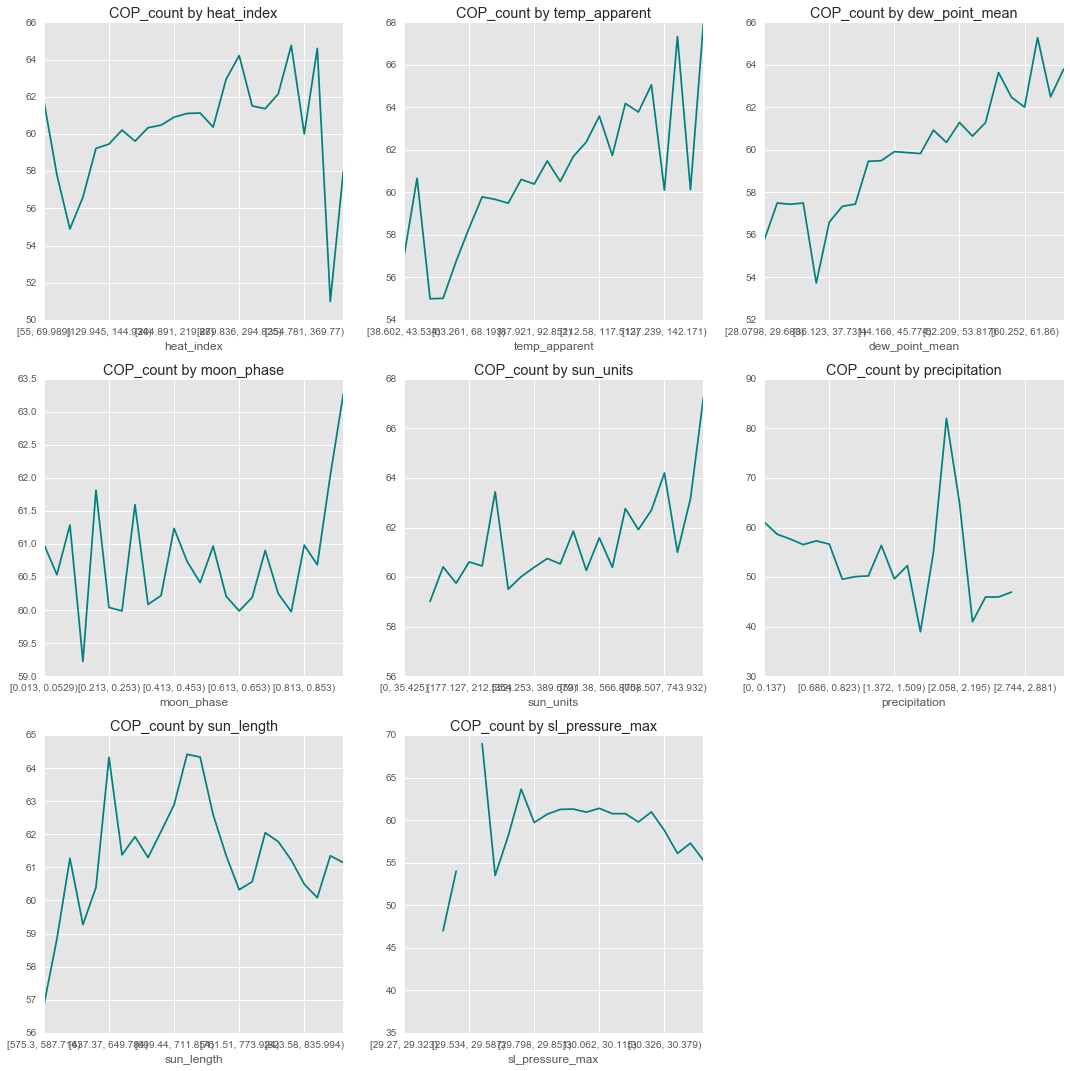

In [28]:
# Non integers
c_features = ['heat_index', 'temp_apparent', 'dew_point_mean', 'moon_phase', 'sun_units', 
              'precipitation', 'sun_length', 'sl_pressure_max']
fig = plt.figure(figsize=(15,15))
for i, field in enumerate(c_features):
    ax = plt.subplot(3,3,i+1)
    plot_title = plot_feature + ' by ' + str(field)
    high = data[field].max()
    low = data[field].min()
    step = (high-low)/25
    grouped = data.groupby(pd.cut(data[field], np.arange(low, high, step), right=False))
    positive_by_group = grouped.mean()
    positive_by_group[plot_feature].plot.line(ax=ax, color='teal', title= plot_title);
plt.tight_layout();

## Investigate Categoricals

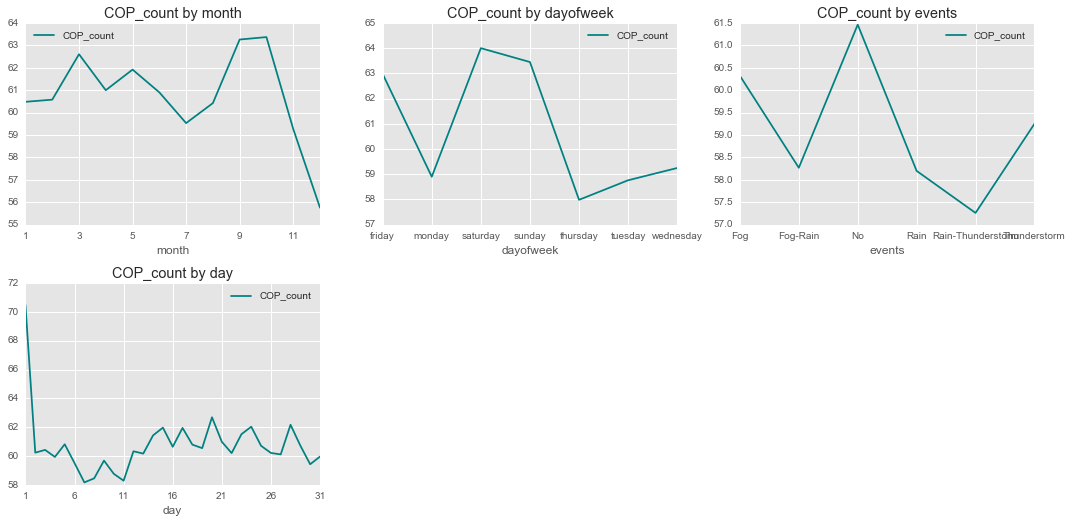

In [29]:
i_features = ['month','dayofweek', 'events','day']
fig = plt.figure(figsize=(15,25))
for i, field in enumerate(i_features):
    ax = plt.subplot(7,3,i+1)
    plot_title = plot_feature + ' by ' + str(field)
    group = data.groupby([field])[[plot_feature]].mean()
    group.plot(ax=ax, kind='line', color='teal', title=plot_title)
#    plot_title = 'Test Positive ratio by ' + str(field)
plt.tight_layout();

In [30]:
data['events'].value_counts()

No                   3512
Rain                  830
Fog                   323
Rain-Thunderstorm      42
Fog-Rain               26
Thunderstorm            4
Name: events, dtype: int64

## New Features

#### End Of Week

In [31]:
list_eow = ['friday', 'saturday']
data.loc[:,'end_of_week'] = data['dayofweek'].apply(lambda x : x in list_eow)
data['end_of_week'].value_counts()

False    3387
True     1350
Name: end_of_week, dtype: int64

#### Winter

In [32]:
data.loc[:,'winter'] = data['month'].apply(lambda x : x in [ 11, 12])
data['winter'].value_counts()

False    3946
True      791
Name: winter, dtype: int64

#### Rain

In [33]:
data['events'] = data['events'].astype('object')
data.loc[:,'rain'] = data['events'].str.contains('Rain', case=False)
data['events'] = data['events'].astype('category')

## Save to CSV

In [34]:
data.to_csv('sf_crime_weather_cleaned.csv')